# Assignment 2 - sxb180048

## PREPROCESSING DATA 

#### Importing Packages

In [380]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report
import math
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier

### Functions

#### Importing Energy Data

In [6]:
#Read Data
datadf=pd.read_csv("energydata_complete.csv")


#### Exploratory Data Analysis


In [7]:
# Data EDA
datadf.head()
datadf.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

           ...                 T9          RH_9         T_out   Press_mm_hg  \
count      ...       19735.000000  19735.000000  19735.000000  19735.000000   
mean       ...          19.485828     41.552401      7.411665    755.522602   
std        ...           2.014712      4.151497      5.317409      7.399441   
min        ...          14.890000     29.166667     -5.000000    729.300000   
25%        ...          18.000000     38.500000      3.666667    750.933333   
50%        ...          19.390000     40.900000      6.916667    756.100000   
75%        ...          20.600000     44.338095     10.408333    760.933333   
max        ...          24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

#### Correlation

In [20]:
#Raw Correlation
datadf.corr()

Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances     1.000000  0.197278  0.055447  0.086031  0.120073 -0.060465   
lights         0.197278  1.000000 -0.023528  0.106968 -0.005622  0.050985   
T1             0.055447 -0.023528  1.000000  0.164006  0.836834 -0.002509   
RH_1           0.086031  0.106968  0.164006  1.000000  0.269839  0.797535   
T2             0.120073 -0.005622  0.836834  0.269839  1.000000 -0.165610   
RH_2          -0.060465  0.050985 -0.002509  0.797535 -0.165610  1.000000   
T3             0.085060 -0.097393  0.892402  0.253230  0.735245  0.137319   
RH_3           0.036292  0.131161 -0.028550  0.844677  0.121497  0.678326   
T4             0.040281 -0.008859  0.877001  0.106180  0.762066 -0.047304   
RH_4           0.016965  0.114936  0.097861  0.880359  0.231563  0.721435   
T5             0.019760 -0.078745  0.885247  0.205797  0.720550  0.110409   
RH_5           0.006955  0.141233 -0.014782  0.303258  0.029595  0.250271   
T6             0.117638 -0.079029  0.654769  0.316141  0.801186 -0.009670   
RH_6          -0.083178  0.153756 -0.615045  0.245126 -0.580372  0.389933   
T7             0.025801 -0.135347  0.838705  0.021397  0.663660 -0.051422   
RH_7          -0.055642  0.035069  0.135182  0.801122  0.229212  0.690584   
T8             0.039572 -0.071458  0.825413 -0.030053  0.578191 -0.041023   
RH_8          -0.094039  0.012915 -0.006441  0.736196  0.068534  0.679777   
T9             0.010010 -0.157592  0.844777  0.115263  0.675535  0.054544   
RH_9          -0.051462 -0.008766  0.071756  0.764001  0.157346  0.676467   
T_out          0.099155 -0.074424  0.682846  0.340767  0.792255  0.033674   
Press_mm_hg   -0.034885 -0.010576 -0.150574 -0.293957 -0.133028 -0.255646   
RH_out        -0.152282  0.068543 -0.345481  0.274126 -0.505291  0.584911   
Windspeed      0.087122  0.060281 -0.087654  0.204932  0.052495  0.069190   
Visibility     0.000230  0.020038 -0.076210 -0.021057 -0.069721 -0.005368   
Tdewpoint      0.015353 -0.036322  0.571309  0.639106  0.582602  0.499152   
rv1           -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   
rv2           -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   

                   T3      RH_3        T4      RH_4    ...           T9  \
Appliances   0.085060  0.036292  0.040281  0.016965    ...     0.010010   
lights      -0.097393  0.131161 -0.008859  0.114936    ...    -0.157592   
T1           0.892402 -0.028550  0.877001  0.097861    ...     0.844777   
RH_1         0.253230  0.844677  0.106180  0.880359    ...     0.115263   
T2           0.735245  0.121497  0.762066  0.231563    ...     0.675535   
RH_2         0.137319  0.678326 -0.047304  0.721435    ...     0.054544   
T3           1.000000 -0.011234  0.852778  0.122737    ...     0.901324   
RH_3        -0.011234  1.000000 -0.140457  0.898978    ...    -0.195270   
T4           0.852778 -0.140457  1.000000 -0.048650    ...     0.889439   
RH_4         0.122737  0.898978 -0.048650  1.000000    ...    -0.044518   
T5           0.888169 -0.050062  0.871813  0.091812    ...     0.911055   
RH_5        -0.066355  0.375422 -0.076489  0.352591    ...    -0.138509   
T6           0.686882  0.076833  0.652350  0.259047    ...     0.667177   
RH_6        -0.647672  0.514912 -0.703149  0.392178    ...    -0.738940   
T7           0.847374 -0.250090  0.877763 -0.131204    ...     0.944776   
RH_7         0.172624  0.832685  0.043527  0.894301    ...     0.028055   
T8           0.795283 -0.283228  0.796256 -0.167066    ...     0.869338   
RH_8         0.044427  0.828822 -0.095192  0.847259    ...    -0.113014   
T9           0.901324 -0.195270  0.889439 -0.044518    ...     1.000000   
RH_9         0.134602  0.833538 -0.025549  0.856591    ...    -0.008683   
T_out        0.699417  0.118207  0.663478  0.293289    ...     0.668220   
Press_mm_hg -0.189974 -0.233274 -0.075292 -0.250748    ...    -0.156828   
RH_out      -0.281718  0.356192 -0.388602  0.336813   

#### Corealtion PLot

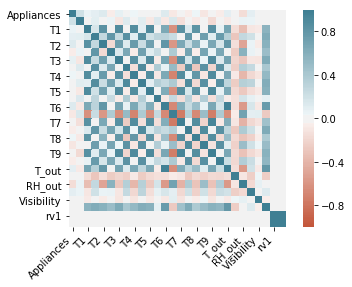

In [21]:
corr = datadf.corr()
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

In [ ]:
sns.pairplot(datadf,hue='Appliances')

#### Correlation based on Threshold

In [22]:
# Function of Correlation
def correlation(data, threshold=0.85):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = data.corr()
    print('Correlation with more than',threshold)
    print('Corr Value',"\t""\t", 'Fearture1', "\t", 'Feature 2')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print(corr_matrix.iloc[i, j], "\t", corr_matrix.columns[i], "\t" "\t", corr_matrix.columns[j])

In [23]:
correlation(datadf)

Correlation with more than 0.85
Corr Value 		 Fearture1 	 Feature 2
0.8924022851105534 	 T3 		 T1
0.8770010621969784 	 T4 		 T1
0.8527777303850508 	 T4 		 T3
0.8803585351891977 	 RH_4 		 RH_1
0.8989782902830947 	 RH_4 		 RH_3
0.8852468734266851 	 T5 		 T1
0.8881689127749756 	 T5 		 T3
0.8718134776269506 	 T5 		 T4
0.8777628824299991 	 T7 		 T4
0.8706241968593113 	 T7 		 T5
0.8943012488817869 	 RH_7 		 RH_4
0.8821232262844226 	 T8 		 T7
0.8839839643177134 	 RH_8 		 RH_7
0.9013235850825261 	 T9 		 T3
0.8894391511402565 	 T9 		 T4
0.9110551178067879 	 T9 		 T5
0.9447764235687138 	 T9 		 T7
0.8693377167311398 	 T9 		 T8
0.8565910846530053 	 RH_9 		 RH_4
0.8586863724042209 	 RH_9 		 RH_7
0.8558118582065599 	 RH_9 		 RH_8
0.9747866900664592 	 T_out 		 T6
1.0 	 rv2 		 rv1


### Comments: Reasons to Drop Columns
##### 1) Since rv2 and rv1 are perfectly correlated
##### 2) Since T3 is highly correlated to T1 and T5
##### 4) RH_4 is highly correlted to RH_1 and RH_3
##### 5) T9 is highly correlated to T3,T4,T5,T7
##### 6) RH_7 is highly Correlated to RH_4,RH_8
##### 7) T_out is higly Correlated to T6
##### 8) Date Column
##### 9) RH_9 is highly correlated to RH_7,RH_8

In [24]:
#1st Instance of Dropping Columns
dropped_datadf =datadf.drop(columns =['date','T_out','RH_7','T9','RH_4','T3','rv2','RH_9'])
                    

In [25]:
correlation(dropped_datadf)

Correlation with more than 0.85
Corr Value 		 Fearture1 	 Feature 2
0.8770010621969784 	 T4 		 T1
0.8852468734266851 	 T5 		 T1
0.8718134776269506 	 T5 		 T4
0.8777628824299991 	 T7 		 T4
0.8706241968593113 	 T7 		 T5
0.8821232262844226 	 T8 		 T7


In [26]:
#Counting values of Lights
datadf['lights'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

### Comments : Reasons to Drop Columns
##### 1) T1 is highlt correlated to T4,T5
##### 2) Lights, as there are too many null values
##### 3) Visibilty's correlation with the dependent variable is too low

In [27]:
# 2nd instance of Dropping Columns
dropped2_datadf = dropped_datadf.drop(columns =['T1','T7','lights','Visibility'])


In [28]:
correlation(dropped2_datadf)

Correlation with more than 0.85
Corr Value 		 Fearture1 	 Feature 2
0.8718134776269506 	 T5 		 T4


In [30]:
F_datadf = dropped2_datadf

#### Outliers

In [34]:
# Removing Outliers using the interquartile range
datadf_rm_out = F_datadf[F_datadf['Appliances']<=175]

#### Binning Data 

In [35]:
datadf_log = datadf_rm_out.copy()
datadf_log['Appliances_class'] = [0 if x <= 60 else 1 for x in datadf_rm_out['Appliances']]
datadf_log = datadf_log.drop(columns=['Appliances'])

#### Scaling the features

In [36]:

scaler = StandardScaler()
datadf_sc = scaler.fit_transform(datadf_rm_out)
datadf_sc = pd.DataFrame(datadf_sc, columns=datadf_rm_out.columns)

C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
y = datadf_log['Appliances_class']
x = datadf_sc.iloc[:, 1:]

## Data Split for SVM

In [263]:
svm_x_train,svm_x_test,svm_y_train,svm_y_test=train_test_split(x,y,test_size=0.3,random_state=33)

## SVM Linear 

In [414]:
svm_score_lin = []
svm_lin_df = pd.DataFrame()
for cost in [0.1, 1, 10, 20]:
    svclassifier_lin = SVC(C=cost,kernel='linear')
    scores_lin = cross_val_score(svclassifier_lin, svm_x_train, svm_y_train, cv=3)
    print(cost, scores_lin.mean())
    scores_lin = scores_lin.mean() 
    svm_score_lin.append(scores_lin)
    values_lin  =  [cost, scores_lin]
    values_lin = pd.DataFrame(values_lin).T
    svm_lin_df = pd.concat([svm_lin_df,values_lin])

0.1 0.7436879850031811
1 0.7435257000885388
10 0.7434444587493539
20 0.7432009127191543


In [539]:
svm_lin_df.columns = ['C', 'Accuracy']

In [540]:
svm_lin_df

C  Accuracy
0   0.1  0.743688
0   1.0  0.743526
0  10.0  0.743444
0  20.0  0.743201

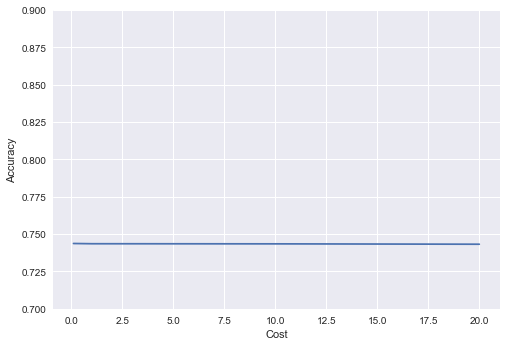

In [466]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c"]
svm_ax_lin=sns.lineplot(data=svm_lin_df ,x='Cost', y='Accuracy', legend='full', palette = flatui)
svm_ax_lin.set(ylim=(0.70, 0.90))
plt.show()

####  The cost value does not change the accuracy by much. This using the value of 0.1

In [556]:
svclassifier_lin = SVC(C=0.1,kernel='linear')
svclassifier_lin.fit(svm_x_train, svm_y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [559]:
y_train_pred_lin = svclassifier_lin.predict(svm_x_train)
print('Confusion Matrix For Linear Train')
print(pd.DataFrame(confusion_matrix(svm_y_train,y_train_pred_lin),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']))
print('')
print('Classification Report For Linear Train')
print(classification_report(svm_y_train,y_train_pred_lin))
print('')
print('Accuracy for Linear Train')
print(accuracy_score(svm_y_train,y_train_pred_lin))

Confusion Matrix For Linear Train
          Predicted 0  Predicted 1
Actual 0         6273         1268
Actual 1         1857         2919

Classification Report For Linear Train
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      7541
           1       0.70      0.61      0.65      4776

   micro avg       0.75      0.75      0.75     12317
   macro avg       0.73      0.72      0.73     12317
weighted avg       0.74      0.75      0.74     12317


Accuracy for Linear Train
0.7462856214987416


In [560]:
y_test_pred_lin = svclassifier_lin.predict(svm_x_test)
print('Confusion Matrix For Linear Test')
print(pd.DataFrame(confusion_matrix(svm_y_test,y_test_pred_lin),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']))
print('')
print('Classification Report For Linear Test')
print(classification_report(svm_y_test,y_test_pred_lin))
print('')
print('Accuracy For Linear Test')
print(accuracy_score(svm_y_test,y_test_pred_lin))

Confusion Matrix For Linear Test
          Predicted 0  Predicted 1
Actual 0         2663          540
Actual 1          802         1275

Classification Report For Linear Test
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      3203
           1       0.70      0.61      0.66      2077

   micro avg       0.75      0.75      0.75      5280
   macro avg       0.74      0.72      0.73      5280
weighted avg       0.74      0.75      0.74      5280


Accuracy For Linear Test
0.7458333333333333


## Linear Learning Curve

In [544]:
train_sizes_lin, train_scores_lin, validation_scores_lin = learning_curve(SVC(C = 0.1,kernel='linear'), 
                                                             X = svm_x_train, 
                                                             y = svm_y_train, 
                                                             train_sizes = [0.2,0.4,0.6,0.8,1],
                                                             cv=5,
                                                             random_state=5,
                                                             shuffle=True)
print('Training scores:\n\n', train_scores_lin)
print('\nValidation scores:\n\n', validation_scores_lin)

Training scores:

 [[0.74365482 0.73705584 0.74162437 0.76395939 0.73959391]
 [0.74720812 0.74543147 0.74467005 0.74568528 0.74086294]
 [0.74792759 0.75046523 0.7408222  0.74166808 0.74522077]
 [0.75282325 0.75104682 0.74495622 0.74140338 0.7462251 ]
 [0.74908648 0.74614292 0.74279334 0.74451888 0.7454324 ]]

Validation scores:

 [[0.73590264 0.73690621 0.7498985  0.73853025 0.74665043]
 [0.73306288 0.73447016 0.75761267 0.73934227 0.74462038]
 [0.73022312 0.73244011 0.75639464 0.73609419 0.74421437]
 [0.73387424 0.7320341  0.76045473 0.73974827 0.74746244]
 [0.73346856 0.73447016 0.7592367  0.74259034 0.75192854]]


In [295]:
train_scores_lin_mean = train_scores_lin.mean(axis=1)
validation_scores_lin_mean = validation_scores_lin.mean(axis=1)
print(train_scores_lin_mean)
print(validation_scores_lin_mean)

[0.74517766 0.74477157 0.74522077 0.74729095 0.7455948 ]
[0.7415776  0.74182167 0.73987329 0.74271476 0.74433886]


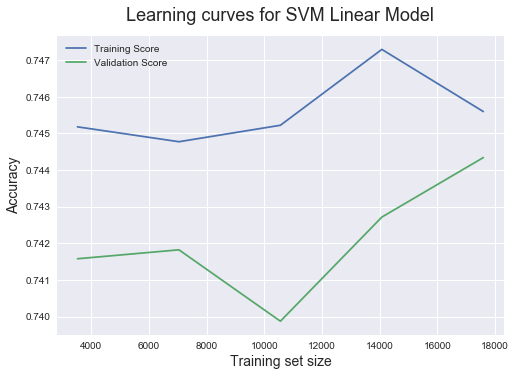

In [561]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_lin_mean, label = 'Training Score')
plt.plot(train_sizes, validation_scores_lin_mean, label = 'Validation Score')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for SVM Linear Model', fontsize = 18, y = 1.03)
plt.legend()

### SVM Polynomial

In [418]:
svm_score_pol = []
svm_pol_df = pd.DataFrame()
for cost in [0.1, 1, 10, 20]:
    for deg in [1,2,3,4]:
        svclassifier_pol = SVC(C = cost, kernel = 'poly',degree = deg,gamma ='auto')
        scores_pol = cross_val_score(svclassifier_pol, svm_x_train, svm_y_train, cv=3)
        print(cost, deg, scores_pol.mean())
        svm_score_pol.append(scores_pol.mean())
        scores_pol = scores_pol.mean()
        values_pol  =  [cost,deg,scores_pol]
        values_pol = pd.DataFrame(values_pol).T
        svm_pol_df = pd.concat([svm_pol_df,values_pol])

0.1 1 0.7357312580798844
0.1 2 0.676869455570302
0.1 3 0.716326859142192
0.1 4 0.6922947692087412
1 1 0.7439313530460261
1 2 0.7302101298931937
1 3 0.7708858371308912
1 4 0.7496142519616679
10 1 0.7433632965156601
10 2 0.7514819326025172
10 3 0.8059592737245772
10 4 0.8071768852173394
20 1 0.7436880641086718
20 2 0.7555414484096731
20 3 0.8101000506472905
20 4 0.8192742704051131


In [431]:
svm_pol_df.columns = ['Cost','Degree','Accuracy']

In [562]:
svm_pol_df

Cost  Degree  Accuracy
0   0.1     1.0  0.735731
0   0.1     2.0  0.676869
0   0.1     3.0  0.716327
0   0.1     4.0  0.692295
0   1.0     1.0  0.743931
0   1.0     2.0  0.730210
0   1.0     3.0  0.770886
0   1.0     4.0  0.749614
0  10.0     1.0  0.743363
0  10.0     2.0  0.751482
0  10.0     3.0  0.805959
0  10.0     4.0  0.807177
0  20.0     1.0  0.743688
0  20.0     2.0  0.755541
0  20.0     3.0  0.810100
0  20.0     4.0  0.819274

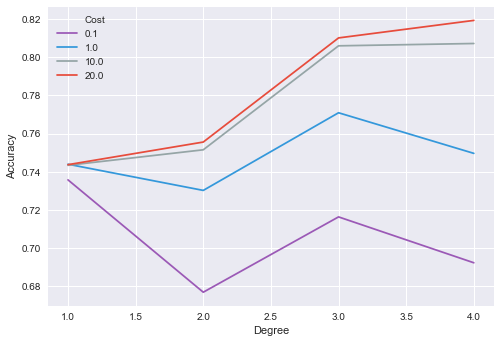

In [464]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c"]
sns.lineplot(data=svm_pol_df ,x='Degree', y='Accuracy', hue= 'Cost', legend='full', palette = flatui   )

#### The best accuracy is acheived with the attributes C = 20 and Degree = 4 

In [551]:
svclassifier_pol = SVC(C=20, kernel='poly',degree = 4, gamma='auto')
svclassifier_pol.fit(svm_x_train, svm_y_train)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [552]:
y_train_pred_pol = svclassifier_pol.predict(svm_x_train)
print('Confusion Matrix For Polynomial Train')
print(pd.DataFrame(confusion_matrix(svm_y_train,y_train_pred_pol),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']))
print('')
print('Classification Report For Polynomial Train')
print(classification_report(svm_y_train,y_train_pred_pol))
print('')
print('Accuracy for Polynomial Train')
print(accuracy_score(svm_y_train,y_train_pred_pol))

Confusion Matrix For Polynomial Train
          Predicted 0  Predicted 1
Actual 0         7148          393
Actual 1         1220         3556

Classification Report For Polynomial Train
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7541
           1       0.90      0.74      0.82      4776

   micro avg       0.87      0.87      0.87     12317
   macro avg       0.88      0.85      0.86     12317
weighted avg       0.87      0.87      0.87     12317


Accuracy for Polynomial Train
0.8690427863927904


In [553]:
y_test_pred_pol = svclassifier_pol.predict(svm_x_test)
print('Confusion Matrix For Polynomial Test')
print(pd.DataFrame(confusion_matrix(svm_y_test,y_test_pred_pol),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']))
print('')
print('Classification Report For Polynomial Test')
print(classification_report(svm_y_test,y_test_pred_pol))
print('')
print('Accuracy For Polynomial Test')
print(accuracy_score(svm_y_test,y_test_pred_pol))

Confusion Matrix For Polynomial Test
          Predicted 0  Predicted 1
Actual 0         2982          221
Actual 1          598         1479

Classification Report For Polynomial Test
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3203
           1       0.87      0.71      0.78      2077

   micro avg       0.84      0.84      0.84      5280
   macro avg       0.85      0.82      0.83      5280
weighted avg       0.85      0.84      0.84      5280


Accuracy For Polynomial Test
0.8448863636363636


In [310]:
## Polynomial Learning Curve

In [311]:
train_sizes_pol, train_scores_pol, validation_scores_pol = learning_curve(SVC(C=20, kernel='poly',degree = 4, gamma ='scale'), 
                                                             X = svm_x_train, 
                                                             y = svm_y_train, 
                                                             train_sizes = [0.2,0.4,0.6,0.8,1],
                                                             cv=5,
                                                             random_state=5,
                                                             shuffle=True)
print('Training scores:\n\n', train_scores_pol)
print('\nValidation scores:\n\n', validation_scores_pol)

In [313]:
train_scores_pol_mean = train_scores_pol.mean(axis=1)
validation_scores_pol_mean = validation_scores_pol.mean(axis=1)
print(train_scores_pol_mean)
print(validation_scores_pol_mean)

[0.88142132 0.87228426 0.87010658 0.86839234 0.86764109]
[0.76187271 0.79678421 0.80855616 0.81984137 0.82722928]


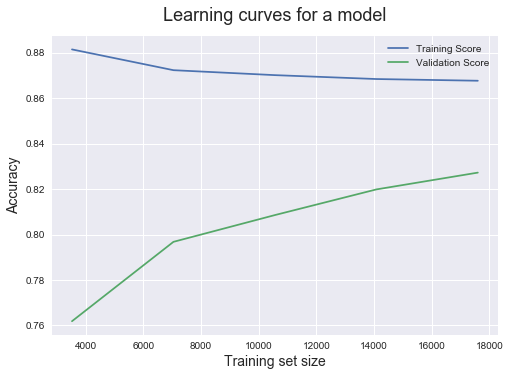

In [542]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_pol_mean, label = 'Training Score')
plt.plot(train_sizes, validation_scores_pol_mean, label = 'Validation Score')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a model', fontsize = 18, y = 1.03)
plt.legend()

## SVM Radial

In [437]:
svm_score_rad = []
svm_rad_df = pd.DataFrame()
for cost in [0.1, 1, 10, 20]:
    for gam in [0.01,0.05,0.001,0.005]:
        svclassifier_rad = SVC(C = cost, kernel = 'rbf',gamma = gam)
        scores_rad = cross_val_score(svclassifier_rad, svm_x_train, svm_y_train, cv=3)
        print(cost, gam, scores_rad.mean())
        svm_score_rad.append(scores_rad.mean())
        scores_rad = scores_rad.mean()
        values_rad  =  [cost,gam,scores_rad]
        values_rad = pd.DataFrame(values_rad).T
        svm_rad_df = pd.concat([svm_rad_df,values_rad])

0.1 0.01 0.7198995004290484
0.1 0.05 0.7617927005012716
0.1 0.001 0.6391979573380132
0.1 0.005 0.7031742462581619
1 0.01 0.7621172703305561
1 0.05 0.8050662122847267
1 0.001 0.72087370432622
1 0.005 0.7518065222081743
10 0.01 0.7919136785061878
10 0.05 0.8388409938101931
10 0.001 0.7506699147381243
10 0.005 0.7738900461362999
20 0.01 0.8023868104250753
20 0.05 0.8448486800952192
20 0.001 0.7561908451610874
20 0.005 0.7832265903615102


Best parameters are Cost = 20 and Gamma = 0.05

In [438]:
svm_rad_df.columns = ['Cost','Gamma','Accuracy']

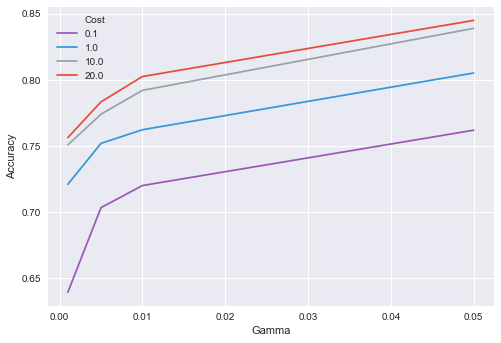

In [463]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c"]

ax_rad = sns.lineplot(data=svm_rad_df ,x='Gamma', y='Accuracy', hue= 'Cost', legend='full', palette = flatui  )
# ax_rad.set(xlim=(0.1, 20))
plt.show()

In [548]:
svclassifier_rad = SVC(C=20,kernel='rbf',gamma=0.05)
svclassifier_rad.fit(svm_x_train, svm_y_train)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [549]:
y_train_pred_rad = svclassifier_rad.predict(svm_x_train)
print('Confusion Matrix For Radial Train')
print(pd.DataFrame(confusion_matrix(svm_y_train,y_train_pred_rad),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']))
print('')
print('Classification Report For Radial Train')
print(classification_report(svm_y_train,y_train_pred_rad))
print('')
print('Accuracy for Radial Train')
print(accuracy_score(svm_y_train,y_train_pred_rad))

Confusion Matrix For Radial Train
          Predicted 0  Predicted 1
Actual 0         7019          522
Actual 1         1000         3776

Classification Report For Radial Train
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7541
           1       0.88      0.79      0.83      4776

   micro avg       0.88      0.88      0.88     12317
   macro avg       0.88      0.86      0.87     12317
weighted avg       0.88      0.88      0.88     12317


Accuracy for Radial Train
0.8764309490947471


In [545]:
y_test_pred_rad = svclassifier_rad.predict(svm_x_test)
print('Confusion Matrix For Radial Test')
print(pd.DataFrame(confusion_matrix(svm_y_test,y_test_pred_rad),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1']))
print('')
print('Classification Report For Radial Test')
print(classification_report(svm_y_test,y_test_pred_rad))
print('')
print('Accuracy For Radial Test')
print(accuracy_score(svm_y_test,y_test_pred_rad))

Confusion Matrix For Radial Test
          Predicted 0  Predicted 1
Actual 0         2959          244
Actual 1          472         1605

Classification Report For Radial Test
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3203
           1       0.87      0.77      0.82      2077

   micro avg       0.86      0.86      0.86      5280
   macro avg       0.87      0.85      0.85      5280
weighted avg       0.86      0.86      0.86      5280


Accuracy For Radial Test
0.8643939393939394


## Radial Learning Curve 

In [324]:
train_sizes_rad, train_scores_rad, validation_scores_rad = learning_curve(SVC(C=20,kernel='rbf',gamma=0.05), 
                                                             X = svm_x_train, 
                                                             y = svm_y_train, 
                                                             train_sizes = [0.1,0.25,0.5,0.7,1],
                                                             cv=5,
                                                             random_state=5,
                                                             shuffle=True)

In [326]:
print('Training scores:\n\n', train_scores_rad)
print('\nValidation scores:\n\n', validation_scores_rad)

Training scores:

 [[0.90152284 0.90253807 0.91979695 0.9106599  0.91472081]
 [0.88997158 0.88509947 0.90093382 0.89118961 0.88388145]
 [0.88530248 0.88550548 0.87799432 0.88103938 0.8771823 ]
 [0.87645012 0.8850058  0.8774652  0.87601508 0.87616009]
 [0.87677629 0.87758831 0.87484775 0.87616728 0.87829882]]

Validation scores:

 [[0.77647059 0.76613886 0.7819732  0.7771011  0.79252944]
 [0.81176471 0.79780755 0.81242387 0.81892002 0.82054405]
 [0.83853955 0.82298011 0.83556638 0.83394235 0.83800244]
 [0.84178499 0.8363784  0.84165652 0.83434836 0.84409257]
 [0.85070994 0.84206253 0.84855867 0.84287454 0.85383678]]


In [325]:
train_scores_rad_mean = train_scores_rad.mean(axis=1)
validation_scores_rad_mean = validation_scores_rad.mean(axis=1)
print(train_scores_rad_mean)
print(validation_scores_rad_mean)

[0.90984772 0.89021518 0.88140479 0.87821926 0.87673569]
[0.77884264 0.81229204 0.83380616 0.83965217 0.84760849]


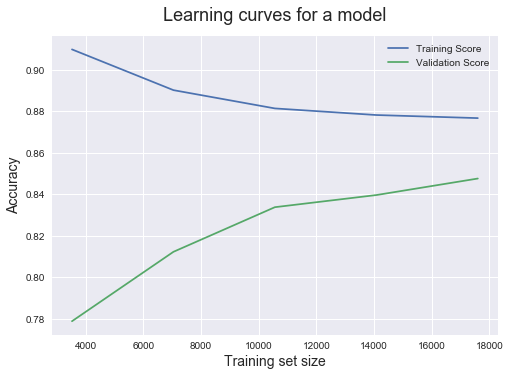

In [541]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_rad_mean, label = 'Training Score')
plt.plot(train_sizes, validation_scores_rad_mean, label = 'Validation Score')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a model', fontsize = 18, y = 1.03)
plt.legend()

# Desicion Tree

In [441]:
dec = datadf_rm_out.copy()
dec['Appliances_class'] = [0 if x <= 60 else 1 for x in dec['Appliances']]
dec_y = dec.drop(columns=['Appliances'])

d_y = dec['Appliances_class']

d_x = dec.iloc[:, 1:16:]

In [442]:
d_x_train, d_x_test, d_y_train, d_y_test = train_test_split(d_x, d_y, test_size=0.3,random_state=33)

In [332]:
clf = DummyClassifier(strategy= 'most_frequent').fit(d_x_train,d_y_train)
y_pred = clf.predict(x_test)

#Distribution of y test
print('y actual : \n' +  str(d_y_test.value_counts()))

#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

y actual : 
0    3203
1    2077
Name: Appliances_class, dtype: int64
y predicted : 
0    5280
dtype: int64


In [333]:

print('Accuracy Score : ' + str(accuracy_score(d_y_test,y_pred)))
print('Precision Score : ' + str(precision_score(d_y_test,y_pred)))
print('Recall Score : ' + str(recall_score(d_y_test,y_pred)))
print('F1 Score : ' + str(f1_score(d_y_test,y_pred)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(d_y_test,y_pred)))

Accuracy Score : 0.6066287878787879
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[3203    0]
 [2077    0]]


C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [454]:
d_score = []
dt_en_df = pd.DataFrame()
for depth in [5,8,9,10,11,12,15,18,20,35,30]:
    for maxf in [0.2,0.4,0.6,0.8,1]:
        en_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = depth, max_features = maxf,)
        d_scores = cross_val_score(en_clf, d_x_train, d_y_train, cv=3)
        print(depth, maxf, d_scores.mean())
        d_score.append(d_scores.mean())
        d_scores = d_scores.mean()
        d_values  =  [depth, maxf, d_scores]
        d_values = pd.DataFrame(d_values).T
        dt_en_df = pd.concat([dt_en_df,d_values])

5 0.2 0.6905089627510043
5 0.4 0.7106437229100774
5 0.6 0.7177891834711451
5 0.8 0.7205495300243902
5 1 0.6641222583272867
8 0.2 0.7475847214863763
8 0.4 0.7562713152217356
8 0.6 0.7727527069404587
8 0.8 0.7768935431922902
8 1 0.7116179465836217
9 0.2 0.769749012120741
9 0.4 0.7686124639798092
9 0.6 0.7738080335185785
9 0.8 0.7760006399634216
9 1 0.7065862638456858
10 0.2 0.7806293791069346
10 0.4 0.7906963241062711
10 0.6 0.7927262896617627
10 0.8 0.7930503848581015
10 1 0.7419020796635802
11 0.2 0.7736455903929546
11 0.4 0.799789440959518
11 0.6 0.8007628340254076
11 0.8 0.802955183377405
11 1 0.7603304355014369
12 0.2 0.7927253206194989
12 0.4 0.7982454006584345
12 0.6 0.8138351746125165
12 0.8 0.8083142244131807
12 1 0.7673952677908744
15 0.2 0.8265004976724198
15 0.4 0.8279611805624362
15 0.6 0.8302341977388091
15 0.8 0.8255259180241664
15 1 0.7994635658896332
18 0.2 0.8203299925106876
18 0.4 0.8299097267913883
18 0.6 0.8290979857962135
18 0.8 0.830073099406531
18 1 0.801657141376

In [455]:
dt_en_df.columns = ['Depth','% MaxFeatures','Accuracy']

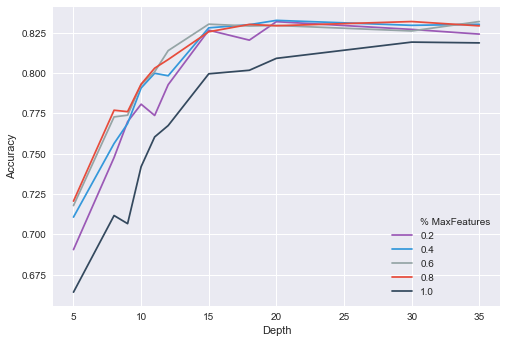

In [461]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
# , "#2ecc71"
sns.lineplot(data=dt_en_df ,x='Depth', y='Accuracy', hue= '% MaxFeatures', legend='full', palette = flatui )

In [495]:
d2_score = []
dt_en_df2 = pd.DataFrame()
for depth in [10,11,12,15,18,20]:
    for maxlf in [100,150,200,250,275,300]:
        en_clf2 = DecisionTreeClassifier(criterion = "entropy", max_depth = depth, max_leaf_nodes = maxlf,)
        d_scores2 = cross_val_score(en_clf2, d_x_train, d_y_train, cv=3)
        print(depth, maxlf, d_scores2.mean())
        d_score.append(d_scores2.mean())
        d_scores2 = d_scores2.mean()
        d_values2  =  [depth, maxlf, d_scores2]
        d_values2 = pd.DataFrame(d_values2).T
        dt_en_df2 = pd.concat([dt_en_df2,d_values2])

10 100 0.7809529007884642
10 150 0.79353718027291
10 200 0.7985711966228285
10 250 0.803767201241798
10 275 0.8040107472719976
10 300 0.8044979579906335
11 100 0.7839569318065184
11 150 0.7945929617076027
11 200 0.8044982150834791
11 250 0.807745396604278
11 275 0.8102624937729147
11 300 0.8115615245922161
12 100 0.7852557253093471
12 150 0.7966224921828943
12 200 0.805066489153945
12 250 0.809450673672249
12 275 0.812779531612433
12 300 0.8165142996029497
15 100 0.7865547363522758
15 150 0.7969473191050241
15 200 0.8046599462596847
15 250 0.8100187499789876
15 275 0.813915486462183
15 300 0.8159454124649291
18 100 0.7865546572467849
18 150 0.7959728976677525
18 200 0.8047410689406331
18 250 0.810343695559354
18 275 0.8143218315927158
18 300 0.8150525685651786
20 100 0.7864734554603455
20 150 0.7975967751855567
20 200 0.805228200553778
20 250 0.8118050112932976
20 275 0.8133476079191716
20 300 0.8161889782715015


In [496]:
dt_en_df2.columns = ['Depth','Max LF','Accuracy']

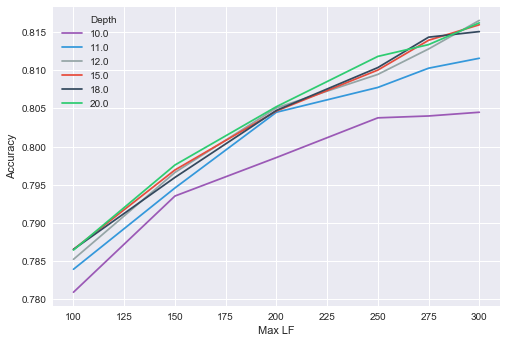

In [497]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# 
sns.lineplot(data=dt_en_df2 ,x = 'Max LF', y ='Accuracy', hue = 'Depth', legend ='full', palette = flatui )

In [ ]:
Best Attributes are Max Depth of 15 at Max leaf nodes 275 and max features at 0.6

In [520]:
train_dict ={}
test_dict ={}
max_depth =[15]
for depth in max_depth:    
    # Create Decision Tree classifer object
    d_clf = DecisionTreeClassifier(criterion="entropy", max_depth= depth, max_features = 0.6,max_leaf_nodes =275)

    # Train Decision Tree Classifer
    d_clf = d_clf.fit(d_x_train,d_y_train)

    d_y_pred_train = d_clf.predict(d_x_train)
    #Predict the response for test dataset
    d_y_pred_test = d_clf.predict(d_x_test)
    # Model Accuracy
    print('Depth:',depth)
    train_accuracy = metrics.accuracy_score(d_y_train, d_y_pred_train)
    test_accuracy = metrics.accuracy_score(d_y_test, d_y_pred_test)
    print("Train Accuracy:",train_accuracy)
    print("Test Accuracy:",test_accuracy)
    train_dict[depth]= train_accuracy
    test_dict[depth]= test_accuracy

Depth: 15
Train Accuracy: 0.8776487781115532
Test Accuracy: 0.8321969696969697


In [521]:
print("Training Metrics")
print('Accuracy Score : ' + str(accuracy_score(d_y_train,d_y_pred_train)))
print('Precision Score : ' + str(precision_score(d_y_train,d_y_pred_train)))
print('Recall Score : ' + str(recall_score(d_y_train,d_y_pred_train)))
print('F1 Score : ' + str(f1_score(d_y_train,d_y_pred_train)))

Training Metrics
Accuracy Score : 0.8776487781115532
Precision Score : 0.9001223990208078
Recall Score : 0.769891122278057
F1 Score : 0.8299289019298047


In [522]:
print("Testing Metrics")
print('Accuracy Score : ' + str(accuracy_score(d_y_test,d_y_pred_test)))
print('Precision Score : ' + str(precision_score(d_y_test,d_y_pred_test)))
print('Recall Score : ' + str(recall_score(d_y_test,d_y_pred_test)))
print('F1 Score : ' + str(f1_score(d_y_test,d_y_pred_test)))

Testing Metrics
Accuracy Score : 0.8321969696969697
Precision Score : 0.8358714043993232
Recall Score : 0.7135291285507944
F1 Score : 0.7698701298701298


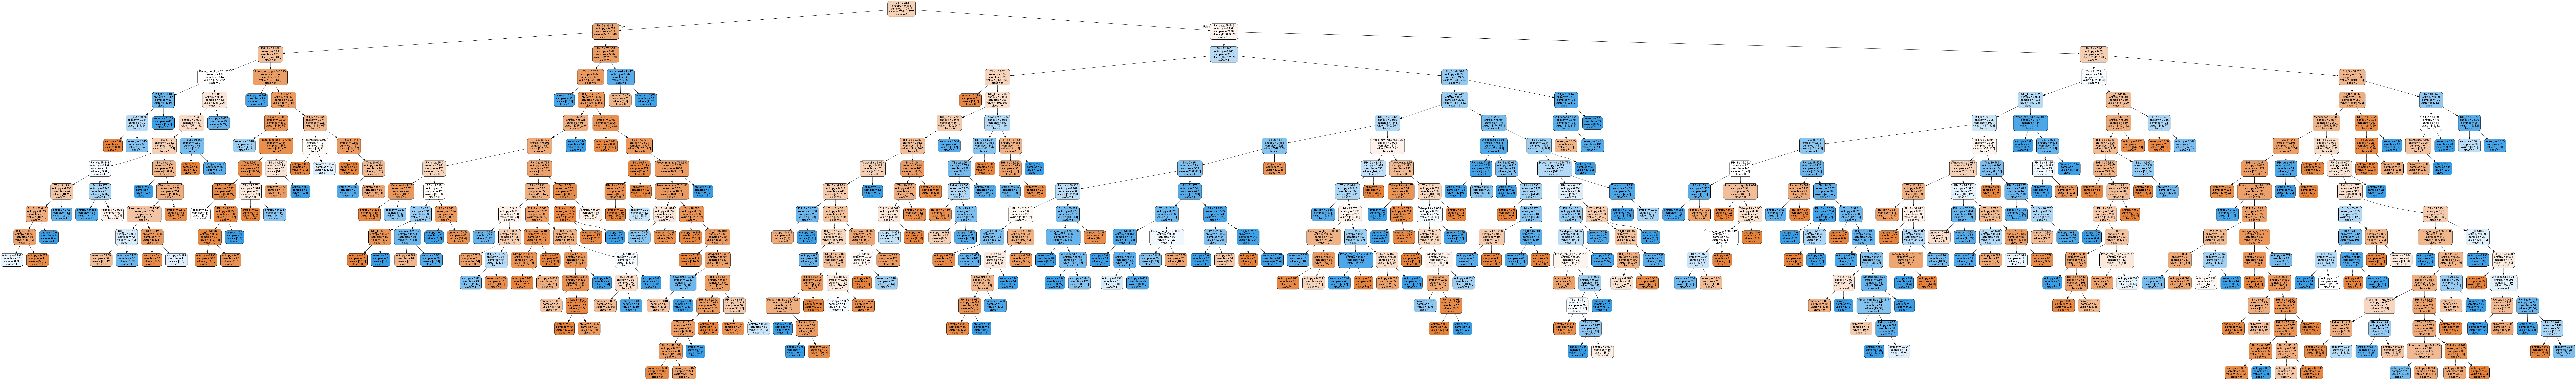

In [512]:
dot_data = StringIO()
export_graphviz(d_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = colnames,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dTree.png')
Image(graph.create_png())

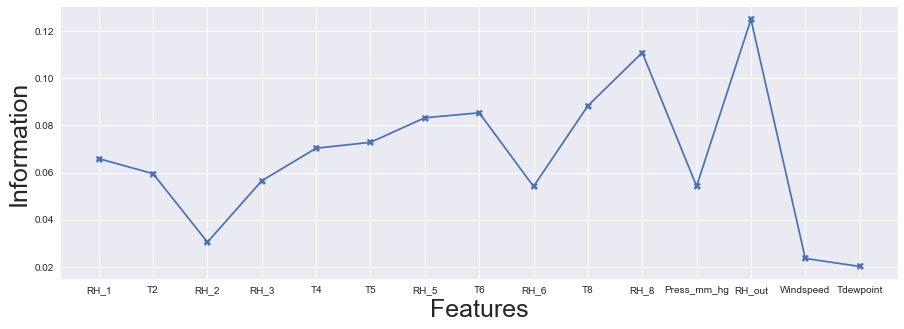

In [523]:
best_features=dict(zip(d_x_train.columns, d_clf.feature_importances_.round(4)))
best_features=pd.DataFrame(best_features,index=['Importance']).T
plt.figure(figsize=(15,5))
plt.plot(best_features,marker='X')
plt.xlabel('Features',fontsize=25)
plt.ylabel('Information',fontsize=25)
plt.show()

# Desicion Tree Learning Curve

In [513]:
train_sizes_dt_en, train_scores_dt_en, validation_scores_dt_en = learning_curve(DecisionTreeClassifier(criterion="entropy", max_depth= 15, max_features = 0.6,max_leaf_nodes =275), 
                                                             X = d_x_train, 
                                                             y = d_y_train, 
                                                             train_sizes = [0.2,0.4,0.6,0.8,1])

C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [514]:
print('Training scores:\n\n', train_scores_dt_en)
print('\nValidation scores:\n\n', validation_scores_dt_en)

Training scores:

 [[0.99512789 0.98599269 0.99147381]
 [0.94457978 0.93666261 0.94214373]
 [0.91615916 0.91149005 0.92001624]
 [0.90864799 0.90347138 0.90712546]
 [0.89404457 0.89051273 0.88722445]]

Validation scores:

 [[0.74452021 0.74452021 0.75274056]
 [0.77106673 0.78105212 0.79683313]
 [0.80979055 0.80029226 0.80828258]
 [0.81977594 0.81782757 0.80950061]
 [0.82683877 0.81490502 0.80243605]]


In [515]:
train_scores_dt_en_mean = train_scores_dt_en.mean(axis=1)
validation_scores_dt_en_mean = validation_scores_dt_en.mean(axis=1)

In [516]:
print(train_scores_dt_en_mean)
print(validation_scores_dt_en_mean)

[0.9908648  0.9411287  0.91588848 0.90641494 0.89059392]
[0.74726033 0.78298399 0.8061218  0.81570137 0.81472661]


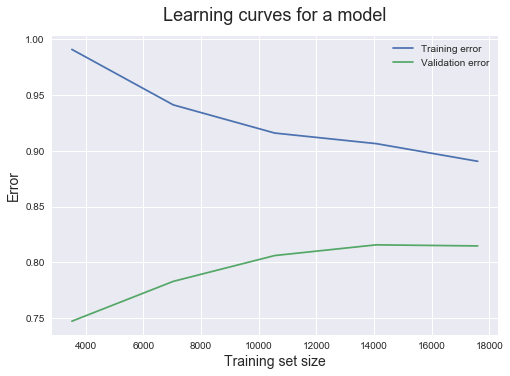

In [517]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_dt_en_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_dt_en_mean, label = 'Validation error')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a model', fontsize = 18, y = 1.03)
plt.legend()

# Boosting

In [185]:
bo_y = d_y.copy()
bo_x = d_x.copy()

In [186]:
bo_x_train, bo_x_test, bo_y_train, bo_y_test = train_test_split(bo_x, bo_y, test_size=0.3,random_state=33)

In [202]:
boost_df = pd.DataFrame()
estimators = [75,100,125]
learningrate = [0.5,0.1,0.01]
for est in estimators:
    for lrate in learningrate:
        # Create adaboost classifer object
        ada = AdaBoostClassifier(base_estimator=en_clf,n_estimators = est,
                                 learning_rate = lrate)
        # Train Adaboost Classifer
        model = ada.fit(bo_x_train, bo_y_train)
        # Predict Test Dataset
        bo_y_pred_train = model.predict(bo_x_train)
        #Predict the response for test dataset
        bo_y_pred_test = model.predict(bo_x_test)
        print("Estimators:",est)
        print("Learning Rate:",lrate)
        bo_train_acc = metrics.accuracy_score(bo_y_train, bo_y_pred_train)
        bo_test_acc = metrics.accuracy_score(bo_y_test, bo_y_pred_test)
        print("Train Accuracy:",bo_train_acc)
        print("Test Accuracy:",bo_test_acc)
        values  =  [est,lrate,bo_train_acc,bo_test_acc]
        values = pd.DataFrame(values).T
        boost_df = pd.concat([boost_df,values])

Estimators: 75
Learning Rate: 0.5
Train Accuracy: 1.0
Test Accuracy: 0.8784090909090909
Estimators: 75
Learning Rate: 0.1
Train Accuracy: 1.0
Test Accuracy: 0.8782196969696969
Estimators: 75
Learning Rate: 0.01
Train Accuracy: 0.9994316797921572
Test Accuracy: 0.8846590909090909
Estimators: 100
Learning Rate: 0.5
Train Accuracy: 1.0
Test Accuracy: 0.8837121212121212
Estimators: 100
Learning Rate: 0.1
Train Accuracy: 1.0
Test Accuracy: 0.8768939393939394
Estimators: 100
Learning Rate: 0.01
Train Accuracy: 0.9998376227977592
Test Accuracy: 0.8846590909090909
Estimators: 125
Learning Rate: 0.5
Train Accuracy: 1.0
Test Accuracy: 0.8827651515151516
Estimators: 125
Learning Rate: 0.1
Train Accuracy: 1.0
Test Accuracy: 0.8804924242424242
Estimators: 125
Learning Rate: 0.01
Train Accuracy: 1.0
Test Accuracy: 0.8850378787878788


In [230]:
boost_df.columns=['Estimators','LearningRate','TrainAccuracy','TestAccuracy']

In [248]:
boost_df


Estimators  LearningRate  TrainAccuracy  TestAccuracy
0        75.0          0.50       1.000000      0.878409
0        75.0          0.10       1.000000      0.878220
0        75.0          0.01       0.999432      0.884659
0       100.0          0.50       1.000000      0.883712
0       100.0          0.10       1.000000      0.876894
0       100.0          0.01       0.999838      0.884659
0       125.0          0.50       1.000000      0.882765
0       125.0          0.10       1.000000      0.880492
0       125.0          0.01       1.000000      0.885038

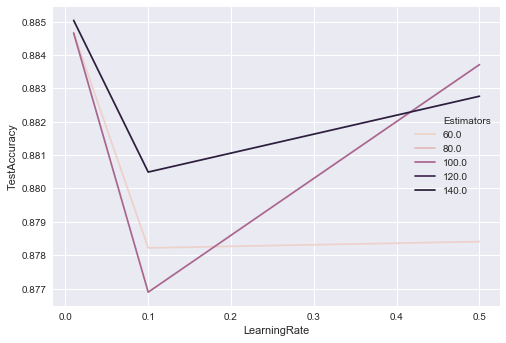

In [258]:
sns.lineplot(data=boost_df ,x='LearningRate', y='TestAccuracy', hue ='Estimators')


In [524]:
 # Create adaboost classifer object
boo = AdaBoostClassifier(base_estimator=d_clf,n_estimators = 100,
                         learning_rate = 0.5)
# Train Adaboost Classifer
model = boo.fit(bo_x_train, bo_y_train)
# Predict Test Dataset
bo_y_pred_train = model.predict(bo_x_train)
#Predict the response for test dataset
bo_y_pred_test = model.predict(bo_x_test)
bo_train_acc = metrics.accuracy_score(bo_y_train, bo_y_pred_train)
bo_test_acc = metrics.accuracy_score(bo_y_test, bo_y_pred_test)
print("Train Accuracy:",bo_train_acc)
print("Test Accuracy:",bo_test_acc)

Train Accuracy: 1.0
Test Accuracy: 0.8778409090909091


In [527]:
train_sizes_bo, train_scores_bo, validation_scores_bo = learning_curve(AdaBoostClassifier(base_estimator=d_clf,n_estimators = 100,learning_rate = 0.5), 
                                                             X = bo_x_train, 
                                                             y = bo_y_train, 
                                                             train_sizes = [0.2,0.4,0.6,0.8,1])

C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [528]:
print('Training scores:\n\n', train_scores_bo)
print('\nValidation scores:\n\n', validation_scores_bo)

Training scores:

 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Validation scores:

 [[0.80345835 0.81490502 0.81729598]
 [0.83195324 0.8407209  0.84336175]
 [0.85119338 0.85776912 0.85408039]
 [0.86044812 0.86093522 0.863581  ]
 [0.87165124 0.86604968 0.85968331]]


In [533]:
train_scores_bo_mean = train_scores_bo.mean(axis=1)
validation_scores_bo_mean = validation_scores_bo.mean(axis=1)

In [534]:
print(train_scores_bo_mean)
print(validation_scores_bo_mean)

[1. 1. 1. 1. 1.]
[0.81188645 0.83867863 0.85434763 0.86165478 0.86579475]


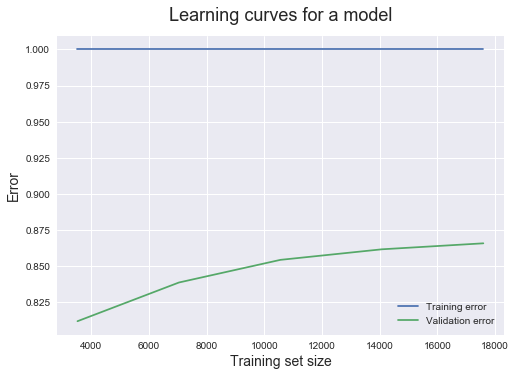

In [535]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_bo_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_bo_mean, label = 'Validation error')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a model', fontsize = 18, y = 1.03)
plt.legend()